<img src="img/stda.png" alt="STDA Logo" style="width: 150px;"/>

# Sailing Team Darmstadt: Einführung in Python

## Importieren

### Aufgabe:
Importiert `numpy` mit dem Namen `np` und `pyplot` aus `matplotlib` mit dem Namen `plt`. Außerdem die Funktionen `sin` und `cos` aus `math`. Danach sollte die darauffolgende Zelle die Funktion sin auf dem Intervall [0, 2pi) Zeichnen.

In [74]:
import numpy                      as np
from   matplotlib import pyplot   as plt
from   math       import sin, cos

### Kontrolle:

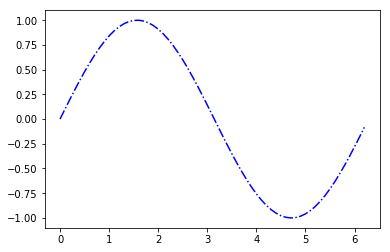

In [75]:
# Der Abstand zwischen x-Werten
dx = 0.1

# Alle werte in [0, 2pi) mit dem Abstand step_size:
# xs = [0, 0.1, 0.2, ... 2pi - 0.1]
xs = np.arange(0, 2 * np.pi, dx)

# Werte sin für alle Werte in xs aus:
ys = np.vectorize(sin)(xs)

# Zeichne den Funktionsgraphen von sin als blau gestrichelte Linie:
plt.plot(xs, ys, '-.b')
plt.show()

## Definieren einer Funktion



### Aufgabe:
Definiert eine Funktion `y(t)` mit der folgenden Abbildungsvorschrift:

\begin{equation}
    y = \frac{sin(t^2)}{t}
\end{equation}

Sowie die Ableitung `y_d(t, y)` mit:

\begin{equation}
\begin{split}
    \dot y &= 2cos(t^2) - \frac{sin(t^2)}{t^2} \\
           &= 2cos(t^2) - \frac{y}{t}
\end{split}
\end{equation}

Dafür braucht ihr:
- `def f(x):` um eine Funktion zu definieren
- `return x` um einen Werte zurück zu geben
- `x**y` um $x^y$ zu berechnen

In [76]:
def y(t):
    return sin(t**2) / t

def y_d(t, y):
    return 2 * cos(t**2) - y / t

### Kontrolle:

In [77]:
# Mit assert können wir zur Laufzeit sicherstellen, dass bestimmte Konditionen erfüllt werden.
# Hier sieht man außerdem den Zeilenumbruch mit \ und das Einfügen variabler Werte mittels %f in einen String.
assert y(1) == 0.8414709848078965, \
       "y(1) sollte 0.8414709848078965 sein, ist aber %f" %y(1)
assert y_d(1, 1) == 0.08060461173627953, \
       "y_d(1, 1)$ sollte 0.08060461173627953 sein, ist aber %f" %y_d(1, 1)

## Simulation

Ein mögliches Einsatzgebiet von Python ist die Simulation, und eine der einfachsten Methoden zur Simulation ist der sogenannte explizite Euler:

\begin{equation}
    y_{j+1} = y_j + \Delta t * f(t_j, y_j)
\end{equation}

Wobei für $f(t, y)$ gilt:
\begin{equation}
    \dot y = f(t, y)
\end{equation}

### Aufgabe:

Für $f(t, y)$ verwenden wir im folgenden Teil die bereits definierte Funktion `y_d(t, y)`. Also brauchen wir jetzt noch eine Funktione `expl_euler(f, t, y, dt=0.1)`. Diese soll später unsere Funktion als f, die Zeit t und den aktuellen Wert y übergeben bekommen.

In [78]:
def expl_euler(f, t, y, dt):
    return y + dt * f(t, y)

def simulate(f, t0, y0, step_size, n_steps):
    ys = np.zeros(n_steps)
    
    for j in range(n_steps - 1):
        ys[j+1] = expl_euler(f, t0 + j * step_size, ys[j], step_size)
    
    return ys

### Kontrolle:

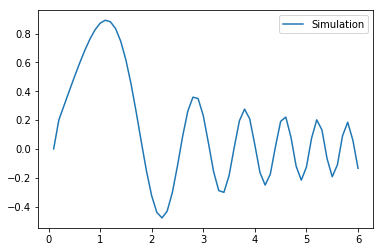

In [79]:
# Unsere Simulationsparameter:
dt      = 0.1
n_steps = 60
y0      = 0
t0      = 0.1

# Ein Vektor mit n_steps Elementen, alle zu Begin 0:
ys = simulate(y_d, t0, y0, dt, n_steps)

# Wir zeichnen unser Simulationsergebnis:
ts = np.arange(t0, t0 + n_steps * dt, dt)  
plt.plot(ts, ys)
plt.legend(["Simulation"])
plt.show()

## Fehleranalyse

Um abzuschätzen, wie große Fehler wir mit der expliziten Eulermethode machen, können wir unser Simulationsergebnis mit der uns bekannten Methode `y(t)` vergleichen.

### Aufgabe:
Berechnet eine Liste `true_ys` mit `y(t)` über `ts`. Damit könnt ihr im Anschluss die absoluten Abweichungen zwischen der Simulation und den wahren Ergebnissen als `error` und dessen Kumulative Summe mittels `np.cumsum(error)` als `cum_error`.

In [80]:
true_ys   = np.vectorize(y)(ts)
error     = np.abs(ys - true_ys)
cum_error = np.cumsum(error)

### Kontrolle:

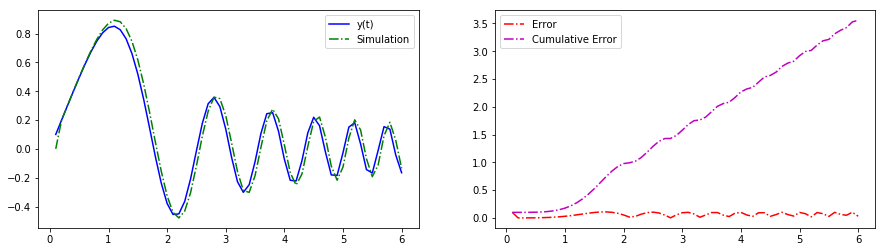

In [82]:
# Einstellen der Plot Dimensionen
plt.figure(figsize=(15,4))

# Hier werden zwei Plots (1 Reihe, 2 Spalten) gleichzeitig gezeichnet:
plt.subplot(1, 2, 1)
plt.plot(ts, true_ys, 'b') 
plt.plot(ts, ys, '-.g')
plt.legend(["y(t)", "Simulation"])

plt.subplot(1, 2, 2)
plt.plot(ts, error, '-.r')
plt.plot(ts, cum_error, '-.m')
plt.legend(["Error", "Cumulative Error"])
plt.show()

<h2> Lust auf mehr? <h2\> 

![infoabend](img/infoabend.png)